In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


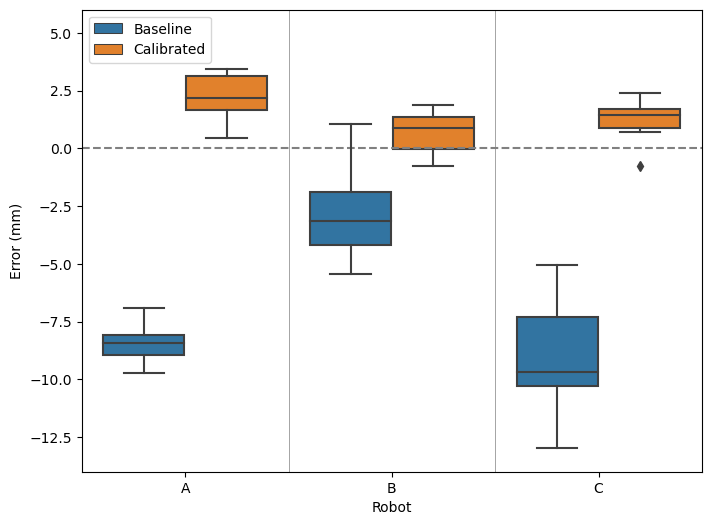

In [60]:
baseline = pd.read_csv('baseline_linear.csv')
baseline -= 500
calibrated = pd.read_csv('calibrated_linear.csv')
calibrated -= 500

# add a type column
baseline['type'] = 'Baseline'
calibrated['type'] = 'Calibrated'
# combine them
df = pd.concat([baseline, calibrated])
# Reshape
df_melted = df.melt(id_vars='type', var_name='Robot', value_name='Error (mm)')

# plot
plt.figure(figsize=(8, 6))
plt.axhline(0, color='grey', linestyle='--', zorder=1)
sns.boxplot(x='Robot', y='Error (mm)', hue='type', data=df_melted, zorder=2)

# add vertical lines to separate robots
num_robots = df_melted['Robot'].nunique()
for x in np.arange(0.5, 1*num_robots, 1):
    plt.axvline(x, color='grey', linestyle='-', linewidth = 0.5, zorder=1)

plt.legend(loc='upper left')
plt.ylim(-14, 6)
plt.show()